In [11]:
import arlpy.uwapm as pm
import numpy as np

In [12]:
x = np.linspace(-5000, 5000, 1080)
z = np.linspace(0, 500,  720)
depth = 450

In [13]:
ssp_range = np.array([-5000, 0, 5000])
ssp_depth = np.array([10, 150, 300, 400])
ssp       = np.array([[1200,  1600, 1600],
                      [1200,  1600, 1600],
                      [1600,  1200, 1200], 
                      [1600,  1600, 1600]])

In [14]:
tx_freq  = 500
tx_depth = 10

In [15]:
env = pm.make_env2d(
                
        pad_inputData   = True, 
        name            = 'Example',

        # BELLHOP/KRAKEN attn
        volume_attn     = None,
        
        # ALL: Receiver positoins
        rx_range        = x,                                                   # m
        rx_depth        = z,                                                   # m
        
        # OALIB: Top boundary condition
        top_boundary    = 'vacuum',
        
        # ALL: Sound speed profiles
        ssp_depth       = ssp_depth,                                           # m
        ssp             = ssp,                                                 # m/s
        ssp_range       = ssp_range,

        # OALIB: Sound speed interpolation
        ssp_interp      = 'c-linear',
        
        # ALL: Source freq and depth
        tx_freq         = tx_freq,                                             # Hz
        tx_depth        = tx_depth,                                            # m

        # ALL: Bottom interface
        bot_interface   = np.column_stack((0, depth)),                 # m
                                                        
        # OALIB: Bottom boundary 
        bot_boundary    = 'acousto-elastic',
        attn_unit       = 'dB/wavelength',
        bot_roughness   = 0.2,                                                 # m (rms)
        bot_density     = 2.75,                                                # g/cm3
        bot_PwaveSpeed  = 6000,                                                # m/s 
        bot_SwaveSpeed  = 3500,                                                # m/s 
        bot_PwaveAttn   = 0.02,                                                # dB/wavelength 
        bot_SwaveAttn   = 0.02,                                                # dB/wavelength 
        )

In [16]:
KRAKEN = pm.KRAKEN(env, cp=True)

[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !


(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Modes] First 5 Shapes'}, ylabel='Depth [m]'>)

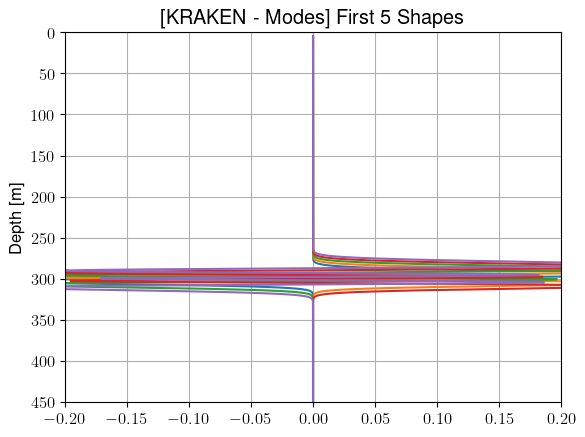

In [17]:
KRAKEN.compute_modes()
KRAKEN.plot_modes(5)

In [18]:
KRAKEN.compute_transmission_loss()

[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !
[WARNING] KRAKEN: Range dependant ssp not supported, using median values instead !


array([[-9.87366507e-16-3.36521192e-15j, -4.55052463e-16+4.19013816e-15j,
         1.92218648e-15-3.39974805e-16j, ...,
         1.92218648e-15-3.39974805e-16j, -4.55052463e-16+4.19013816e-15j,
        -9.87366507e-16-3.36521192e-15j],
       [-9.87366507e-16-3.36521192e-15j, -4.55052463e-16+4.19013816e-15j,
         1.92218648e-15-3.39974805e-16j, ...,
         1.92218648e-15-3.39974805e-16j, -4.55052463e-16+4.19013816e-15j,
        -9.87366507e-16-3.36521192e-15j],
       [-9.87366507e-16-3.36521192e-15j, -4.55052463e-16+4.19013816e-15j,
         1.92218648e-15-3.39974805e-16j, ...,
         1.92218648e-15-3.39974805e-16j, -4.55052463e-16+4.19013816e-15j,
        -9.87366507e-16-3.36521192e-15j],
       ...,
       [-9.77286163e-06-3.09008523e-04j, -5.48296433e-04-2.69718323e-04j,
        -2.67303898e-04+4.97687724e-04j, ...,
        -2.67303898e-04+4.97687724e-04j, -5.48296433e-04-2.69718323e-04j,
        -9.77286163e-06-3.09008523e-04j],
       [-6.52222661e-05-3.27994312e-05j, -4.

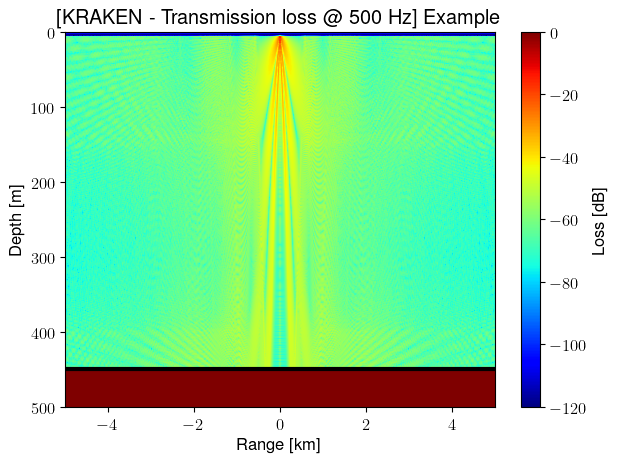

(<Figure size 640x480 with 2 Axes>,
 <Axes: title={'center': '[KRAKEN - Transmission loss @ 500 Hz] Example'}, xlabel='Range [km]', ylabel='Depth [m]'>)

In [19]:
KRAKEN.plot_transmission_loss()

[INFO] KRAKEN: Do not support range dependant sound speed, using median values instead !


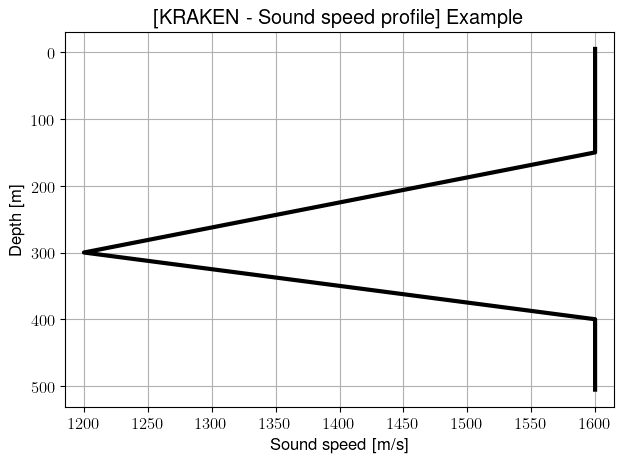

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': '[KRAKEN - Sound speed profile] Example'}, xlabel='Sound speed [m/s]', ylabel='Depth [m]'>)

In [20]:
KRAKEN.plot_ssp()